In [1]:
from google.colab import files
uploaded = files.upload()

In [2]:
from google.colab import files
uploaded = files.upload()

Saving linear_data_eval.csv to linear_data_eval.csv


In [3]:
from google.colab import files
uploaded = files.upload()

Saving linear_data_train.csv to linear_data_train.csv


In [0]:
import numpy as np
import tensorflow as tf
import csv
import matplotlib.pyplot as plt

In [6]:
NUM_LABELS = 2
TAM_BATCH = 100
NUM_EPOCHS = 100

def ler_dados_CSV(arquivo):
  labels = []
  features = []
  with open(arquivo) as arquivo_CSV:
    ler_CSV = csv.reader(arquivo_CSV, delimiter=',')
    for row in ler_CSV:
      labels.append(row[0])
      features.append(row[1:])
      
  features = np.matrix(features).astype(np.float32)  
  labels = np.array(labels).astype(np.uint8)
      
  labels = (np.arange(NUM_LABELS) == labels[:, None]).astype(np.float32) 

  return features, labels
dados_treino, labels_treino = ler_dados_CSV('linear_data_train.csv') 
dados_teste, labels_teste = ler_dados_CSV('linear_data_eval.csv')    

tam_treino, num_features = np.shape(dados_treino)
print(tam_treino, num_features)
print(labels_treino.shape)

1000 2
(1000, 2)


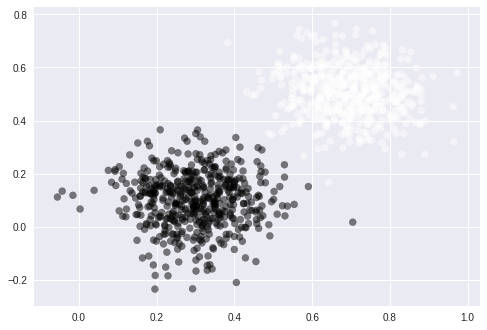

In [7]:
x_grafico = np.asarray(dados_treino[:,0].reshape(1000))[0]
y_grafico = np.asarray(dados_treino[:,1].reshape(1000))[0]
cores = np.asarray(labels_treino[:,0].reshape(1000))

plt.scatter(x_grafico, y_grafico, c=cores, alpha=0.5)
plt.show()

In [8]:
x = tf.placeholder("float", shape=[None, num_features]) 
y_real = tf.placeholder("float", shape=[None, NUM_LABELS]) 

peso = tf.Variable(tf.random.uniform([num_features, NUM_LABELS]))        
bias = tf.Variable(tf.random.uniform([NUM_LABELS]))                     

y_predito = tf.sigmoid(tf.matmul(x, peso) + bias)
erro = tf.reduce_sum(tf.square(y_predito - y_real))
otimizador = tf.train.GradientDescentOptimizer(0.01)  
treinar = otimizador.minimize(erro)

init = tf.global_variables_initializer()

Instructions for updating:
Colocations handled automatically by placer.


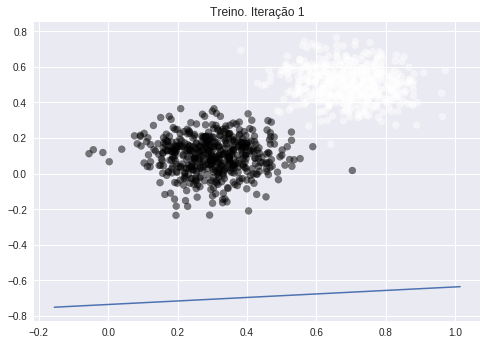

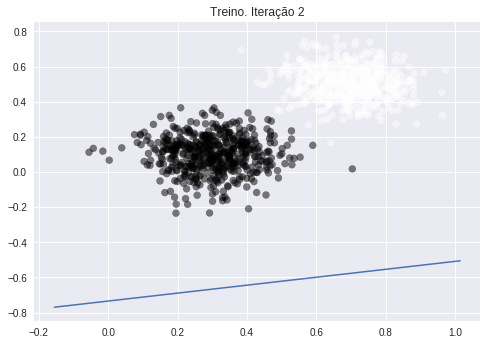

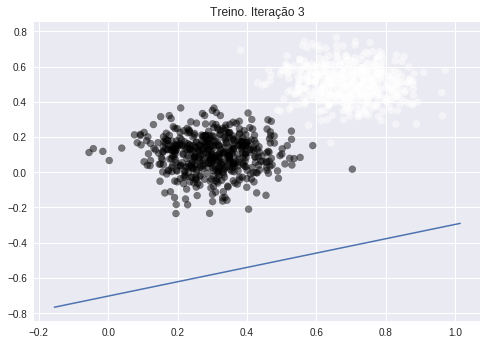

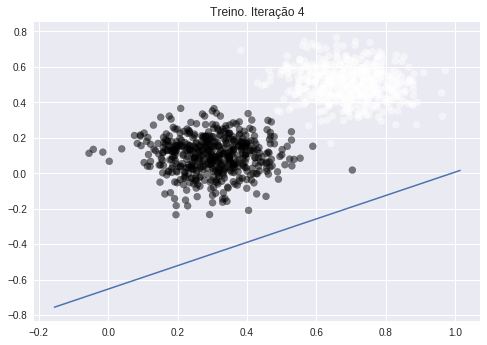

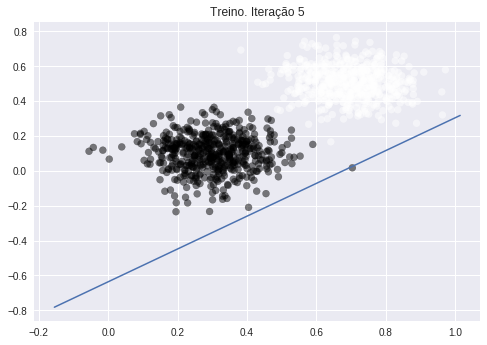

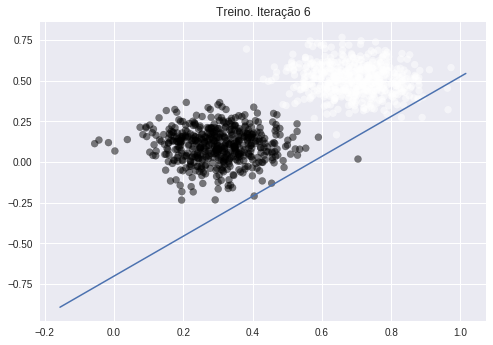

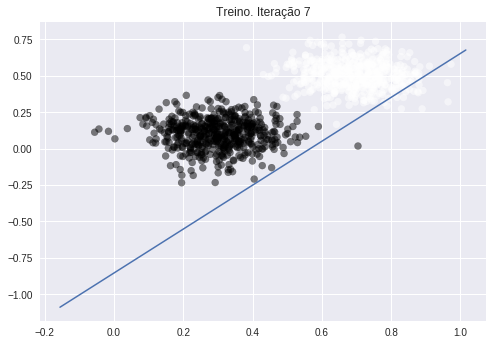

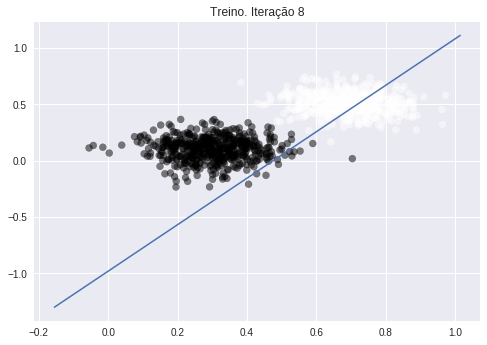

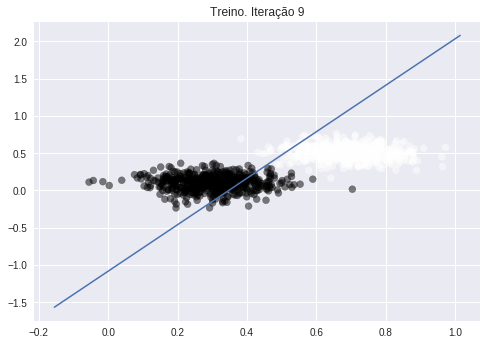

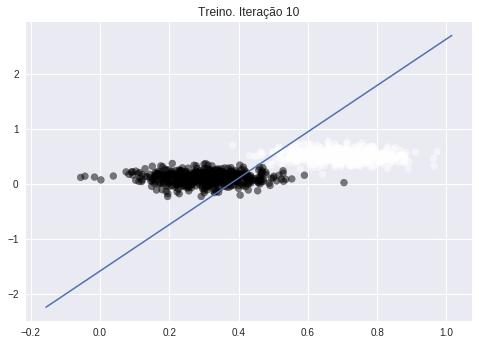

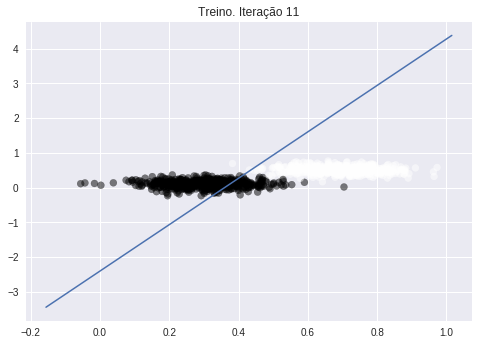

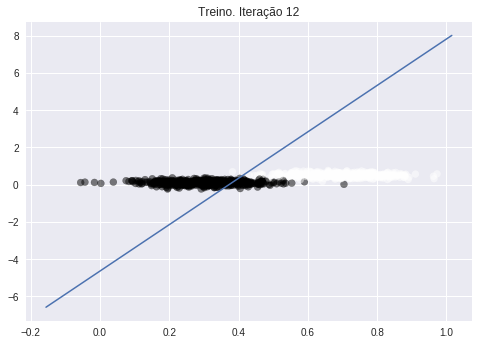

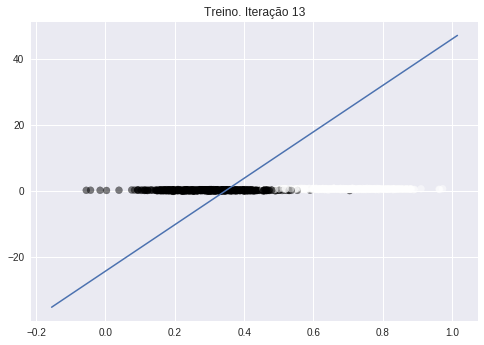

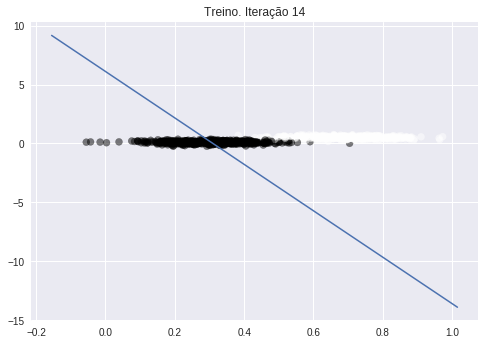

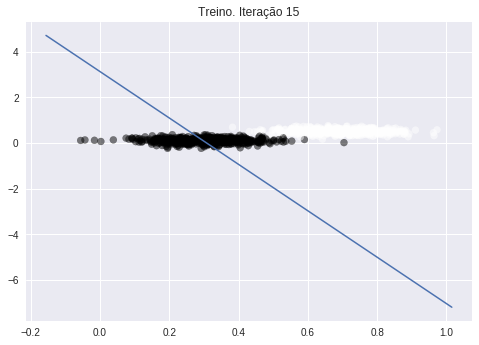

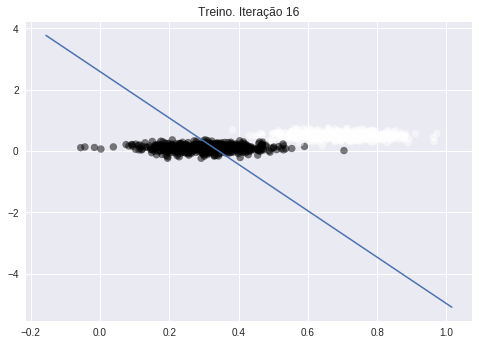

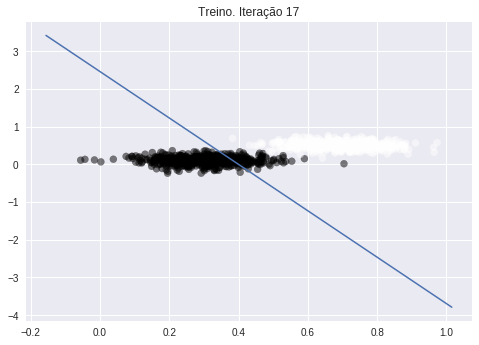

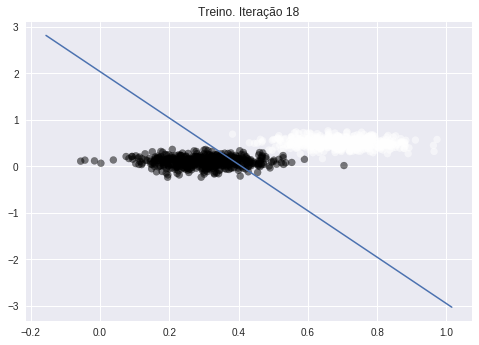

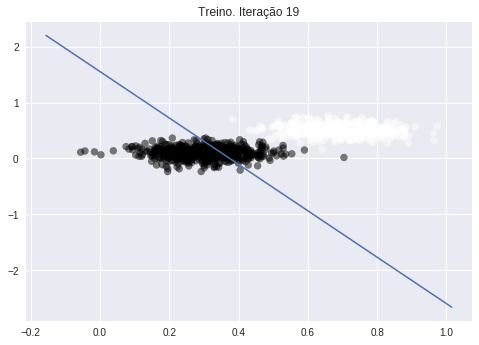

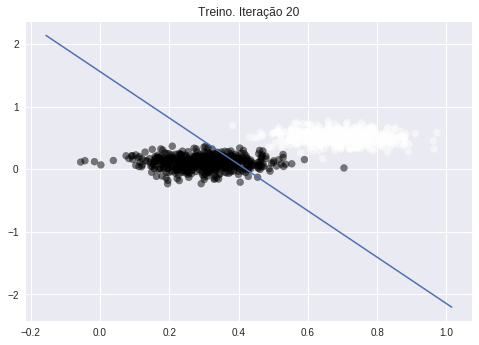

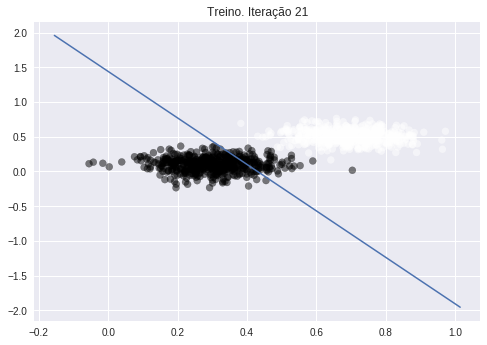

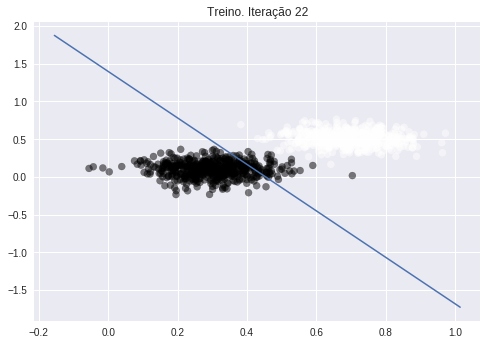

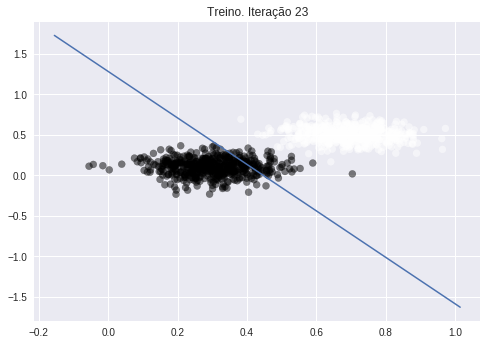

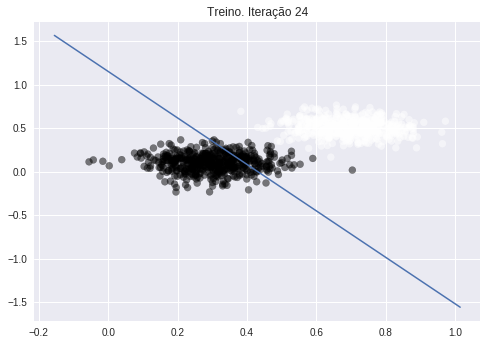

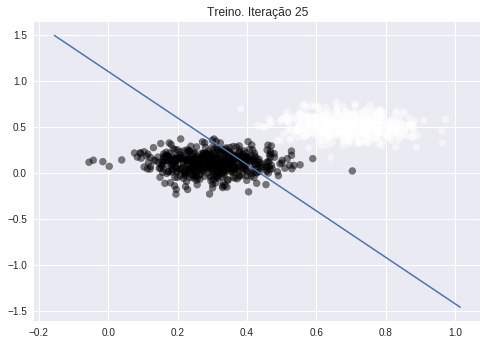

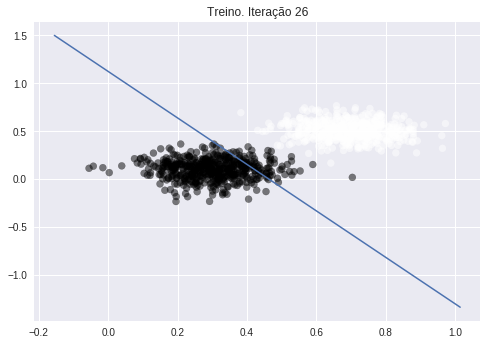

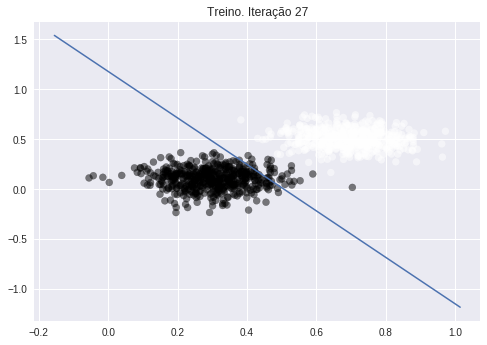

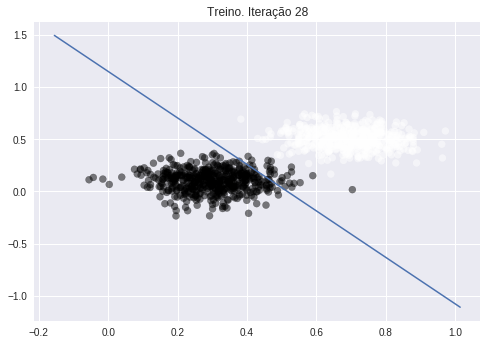

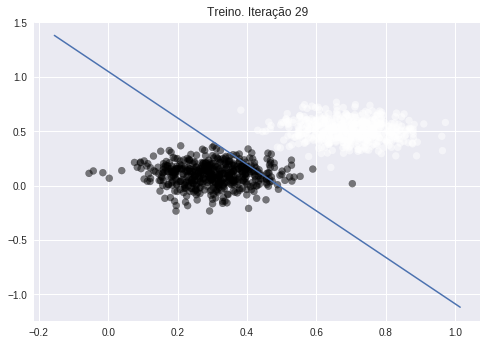

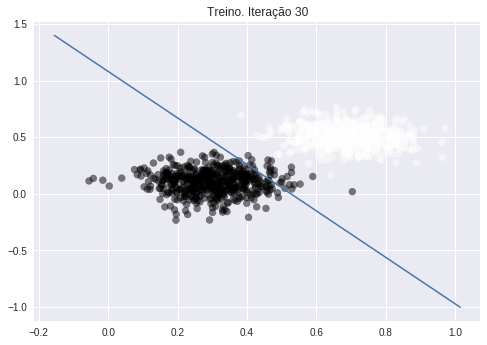

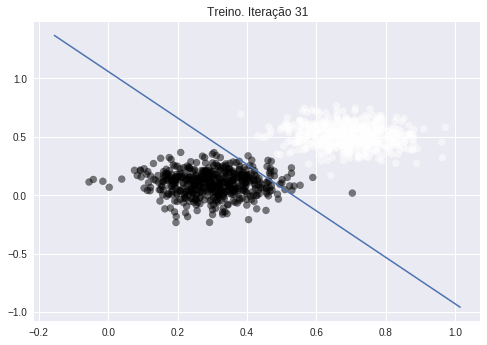

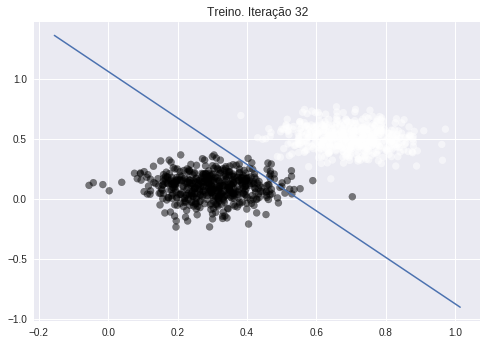

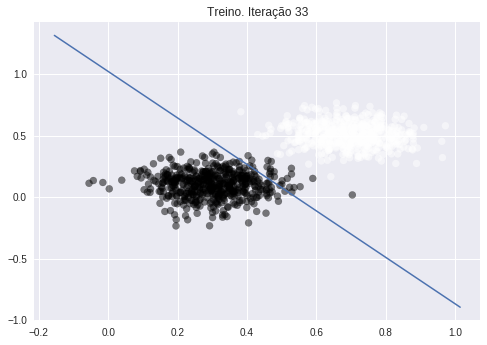

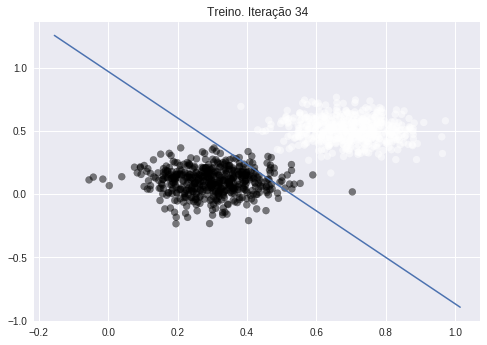

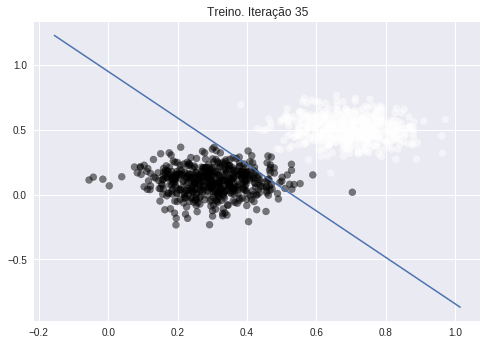

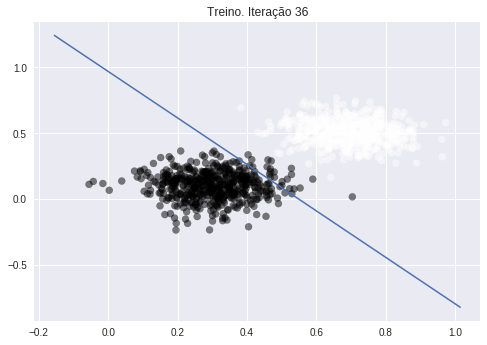

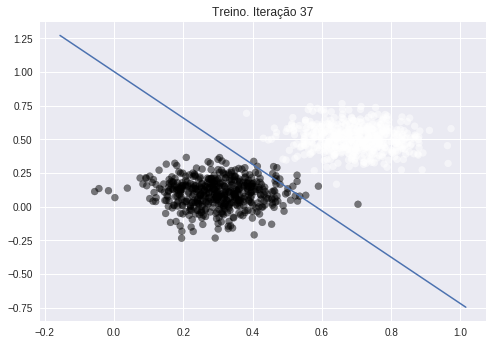

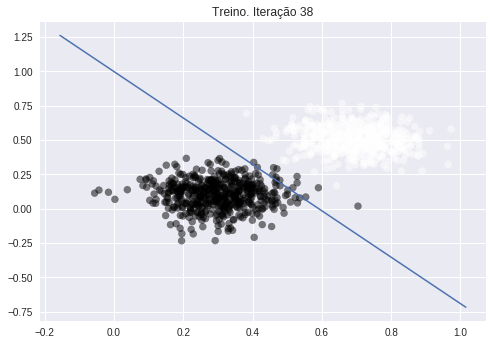

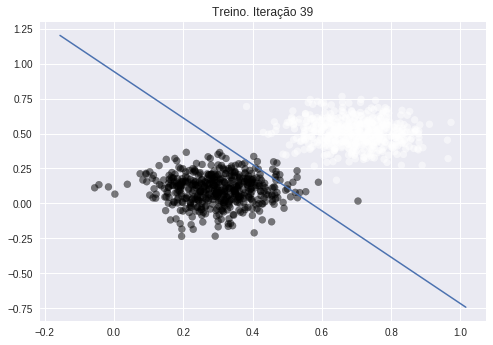

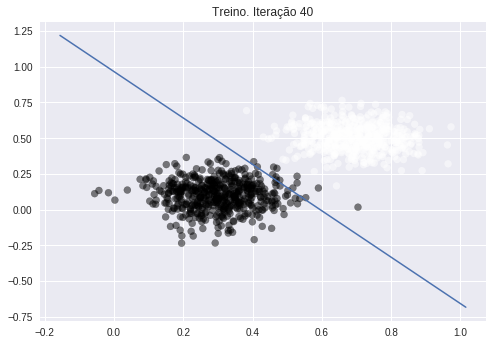

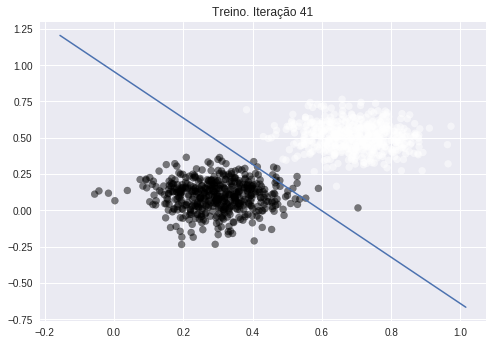

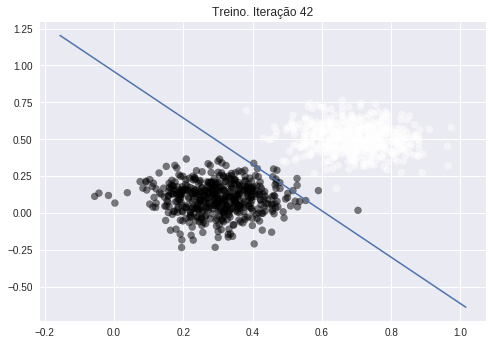

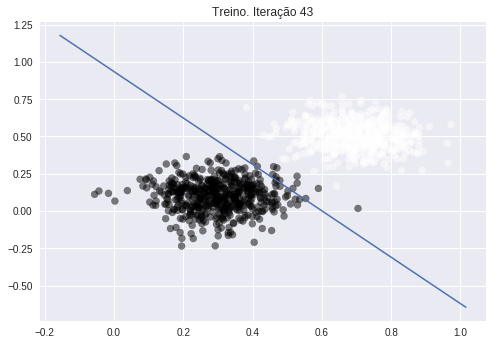

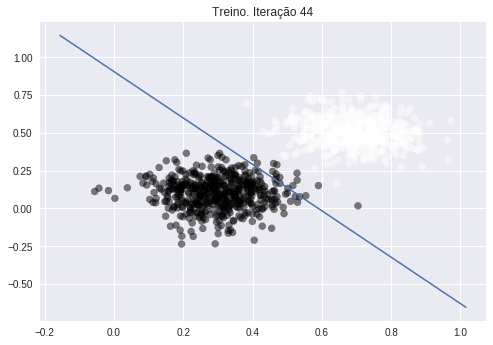

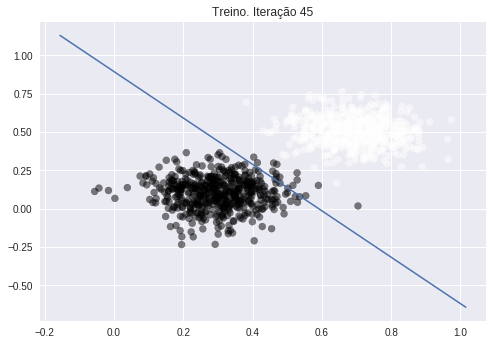

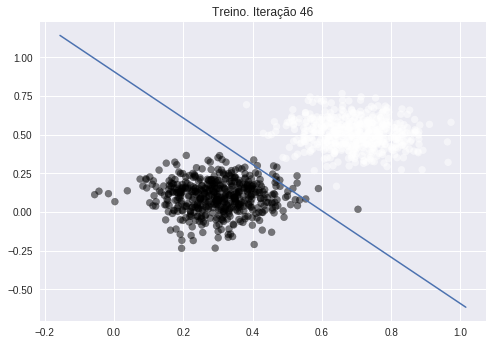

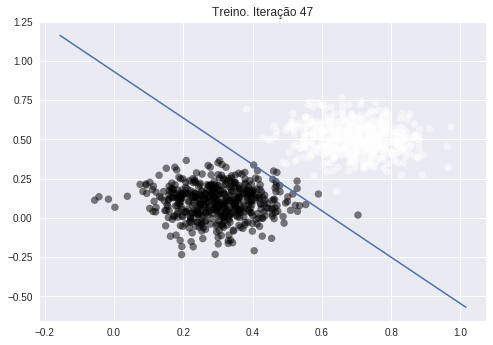

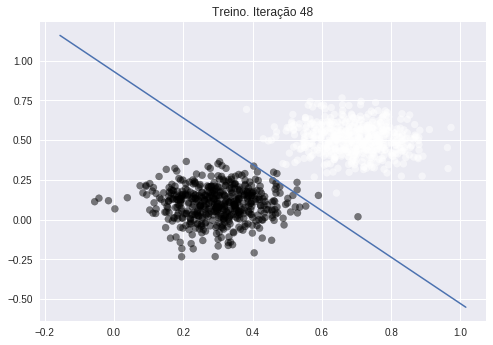

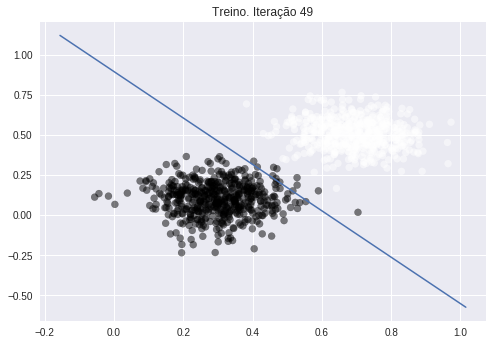

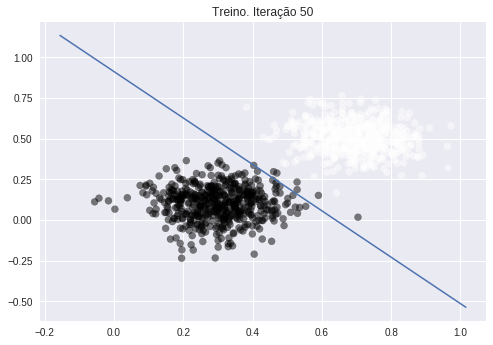

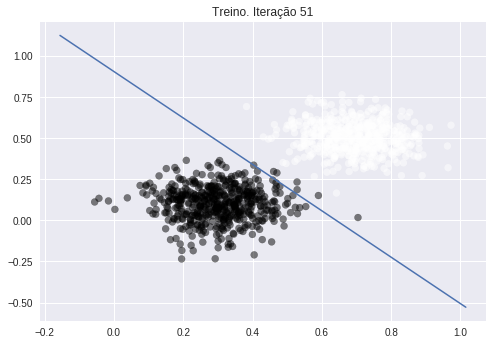

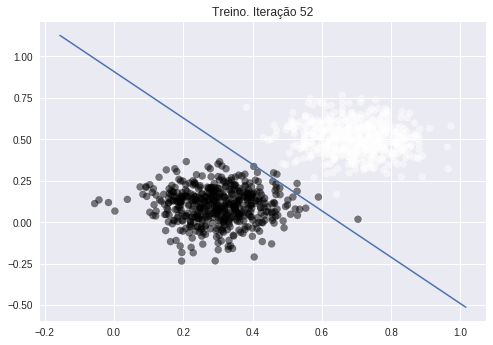

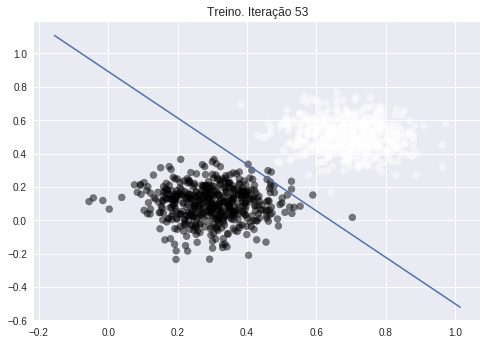

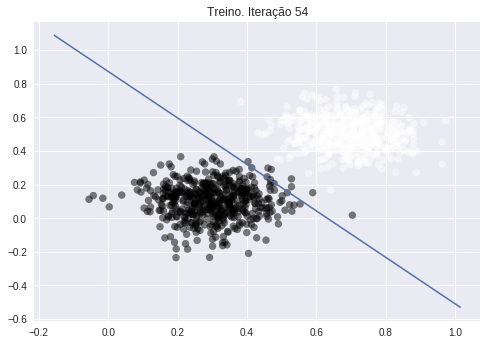

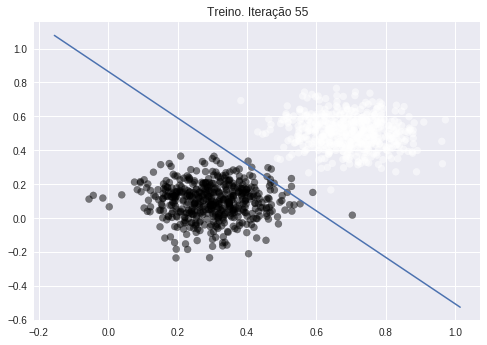

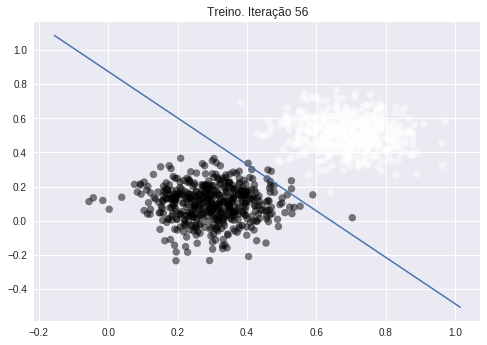

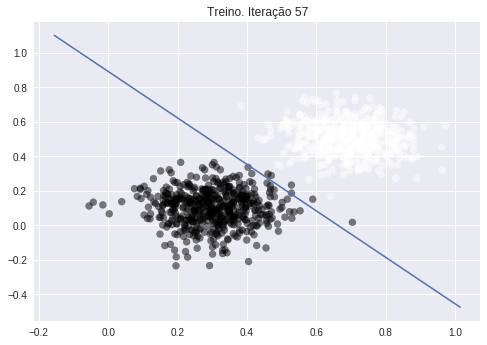

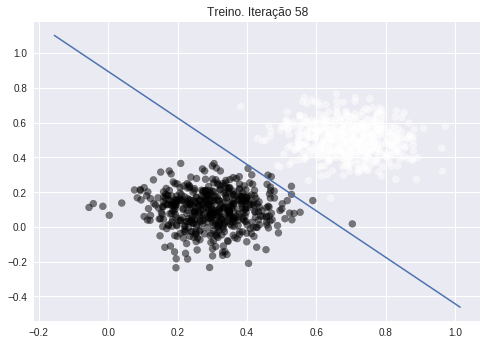

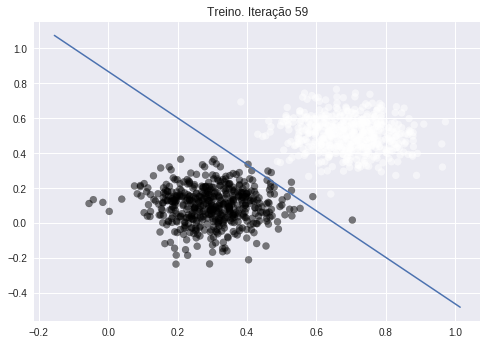

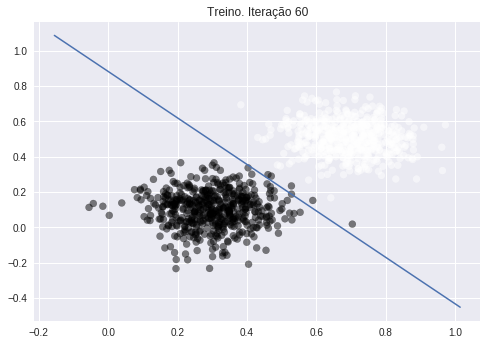

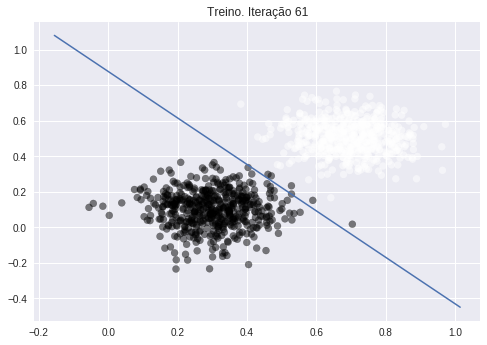

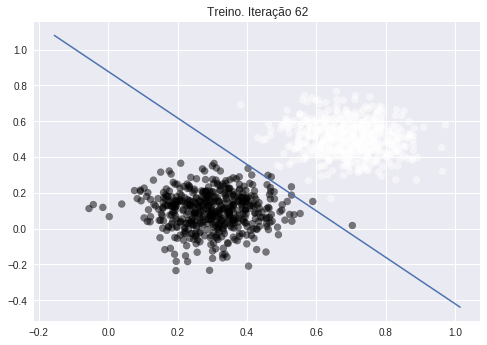

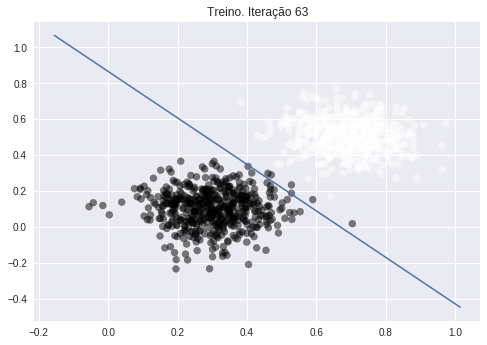

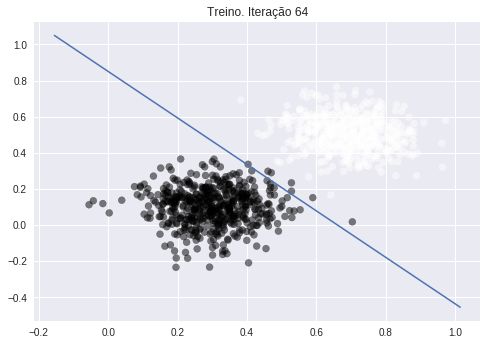

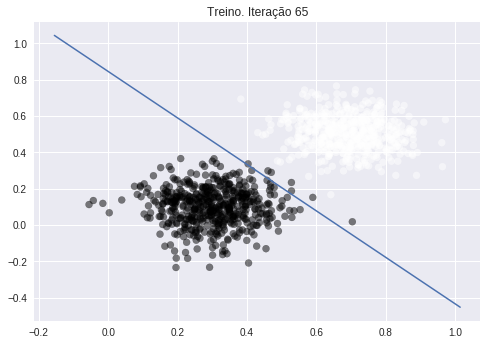

In [0]:
sess = tf.Session()
sess.run(init)
for i in range(NUM_EPOCHS):
    offset = (i * TAM_BATCH) % tam_treino
    dados_batch = dados_treino[offset:(offset + TAM_BATCH), :]    
    labels_batch = labels_treino[offset:(offset + TAM_BATCH)]
    sess.run(treinar, feed_dict={x: dados_batch, y_real: labels_batch})
    
    peso_grafico = sess.run(peso)
    bias_grafico = sess.run(bias)
    
    plot_x = [np.min(dados_treino[:, 0])-0.1, np.max(dados_treino[:, 1])+0.25]  
    plot_y = [-1/peso_grafico[1, 0] * (peso_grafico[0, 0] * plot_x[0] + bias_grafico[0]), -1/peso_grafico[1, 0] * (peso_grafico[0, 0] * plot_x[1] + bias_grafico[0])] 

    x_grafico = np.asarray(dados_treino[:,0].reshape(1000))[0]
    y_grafico = np.asarray(dados_treino[:,1].reshape(1000))[0]
    cores = np.asarray(labels_treino[:,0].reshape(1000))

    plt.scatter(x_grafico, y_grafico, c=cores, alpha=0.5)
    plt.plot(plot_x, plot_y, linewidth=1.5 )
    
    plt.title('Treino. Iteração '+ str(i+1))
    plt.show()

print('Peso final: '); print(sess.run(peso))              
print('Bias final: '); print(sess.run(bias))